# CASE STUDY ON REGRESSION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
data=pd.read_csv(r"C:\Users\Lenovo\Downloads\car_age_price.csv")
data.head()


,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [4]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [5]:
# find the correlation
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


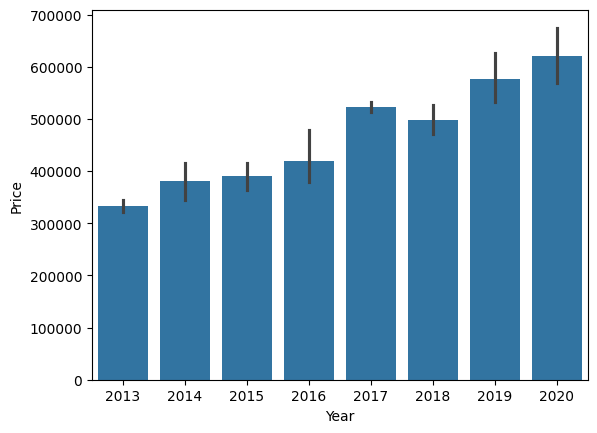

In [10]:
# barplot
sns.barplot(x=data["Year"],y=data["Price"])
plt.show()

In [11]:
# split the target variable from data
x=data.drop(["Price"],axis=1)
y=data["Price"]

In [12]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [13]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

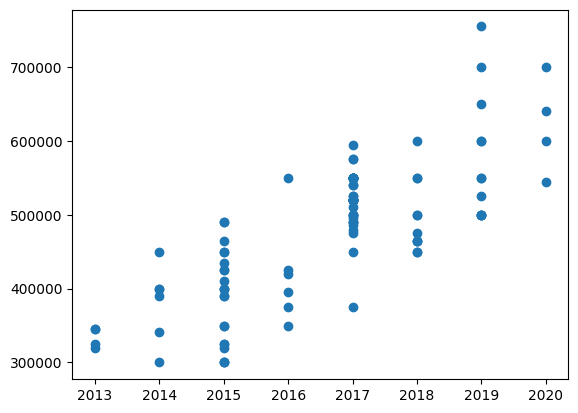

In [14]:
# scatter plot
plt.scatter(x,y,label="Actual data")

# LinearRegression

In [15]:
# train-test-split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [16]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
pred=model.predict(x_test)
pred


array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [18]:
# find mean square error
from sklearn.metrics import mean_squared_error
print("MSE value of linear regression is",mean_squared_error(y_test,pred))

MSE value of linear regression is 4326906256.829671


In [19]:
# R square value
from sklearn.metrics import r2_score
print("R squares value of linear regression is:",r2_score(y_test,pred))

R squares value of linear regression is: 0.36759313425902185


## predict car price of 2022 model

In [20]:
p=model.predict([[2022]])
p

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

## Lasso Rgression

In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.9) 
lasso.fit(x_train, y_train) 


y_pred = lasso.predict(x_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Lasso Regression MSE: {mse}")



Lasso Regression MSE: 4326864419.543729


In [32]:

print("R squares value of lasso regression is:",r2_score(y_test,y_pred))

R squares value of lasso regression is: 0.3675992490637584


### Both the models perform  almost identically.
### Since Lasso Regression has a lower MSE compared to Linear Regression, it is performing slightly better.

